## Reinforcement learning: random decision policy
 
The <b>states</b> are previous history of stock prices, current budget, and current number of shares of a stock.

The <b>actions</b> are buy, sell, or hold (i.e. do nothing).


### import relevant libraries
yahoo_finance: Stopped working from 11/01/2017  
https://github.com/lukaszbanasiak/yahoo-finance/issues/140

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import random
from matplotlib import pyplot as plt  #for plotting stock prices 
#from yahoo_finance import Share
import pandas as pd    #data analysis tools

### get stock data

In [2]:
# microsoft 1992/7/21~2016/7/21
pd.read_csv('MSFT.csv')

,Date,Open,High,Low,Close,Adj Close,Volume
0,1992/7/21,2.187500,2.273438,2.171875,2.242188,1.489199,45907200
1,1992/7/22,2.242188,2.242188,2.171875,2.187500,1.452877,59008000
2,1992/7/23,2.179688,2.257813,2.148438,2.218750,1.473632,68441600
3,1992/7/24,2.222656,2.304688,2.218750,2.273438,1.509954,76259200
4,1992/7/27,2.273438,2.296875,2.257813,2.281250,1.515144,30512000
5,1992/7/28,2.296875,2.328125,2.273438,2.312500,1.535899,45363200
6,1992/7/29,2.328125,2.335938,2.250000,2.312500,1.535899,145273600
7,1992/7/30,2.296875,2.328125,2.281250,2.285156,1.517738,32035200
8,1992/7/31,2.296875,2.296875,2.257813,2.273438,1.509954,35312000
9,1992/8/3,2.273438,2.320313,2.250000,2.304688,1.530710,31516800


In [3]:
def get_prices(filename):
    df = pd.read_csv(filename)  #read csv file
    prices = df['Open'].as_matrix()  #選取'Open'欄位的資料，並轉成 numpy的資料形式
    return prices

In [4]:
prices = get_prices('MSFT.csv')

In [5]:
print (len(prices))
print (prices)

6047
[  2.1875     2.242188   2.179688 ...,  53.709999  56.150002  55.98    ]


### plot the stock prices

In [6]:
def plot_prices(prices):
    plt.title('Opening stock prices')
    plt.xlabel('day')
    plt.ylabel('price ($)')
    plt.plot(prices)
    plt.savefig('prices.png')
    plt.show()

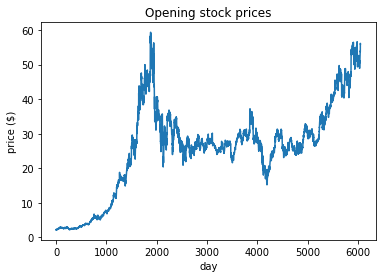

In [7]:
plot_prices(prices)

### DecisionPolicy
Define an abstract class called DecisionPolicy:

In [8]:
class DecisionPolicy:
    def select_action(self, current_state, step):
        # current state: history of stock prices, current budget, current number of shares of a stock
        # given a state, the decision policy will calculate the next action to take
        pass

    def update_q(self, state, action, reward, next_state):
        # actions: buy, sell, hold
        # improve the Q-function from a new experience of taking function
        pass

### Decision Policy: random decision policy

### 1. Infer(s) -> a
the algorithm selects the best action (a) given a state (s) using the knowledge it has so far.

### 2. Do(s, a) -> r, s'
it does the action to find out the reward (r) as well as the next state (s’).

### 3. Learn(s, r, a, s') 
Then it improves its understanding
of the world using the newly acquired knowledge (s, r, a, s’).

In [9]:
class RandomDecisionPolicy(DecisionPolicy):   
    # inherit from DecisionPolicy to implement its function
    def __init__(self, actions):
        self.actions = actions

    def select_action(self, current_state, step):
        # randomly choose the next action
        action = random.choice(self.actions)
        return action

Define a function to run a simulation of buying and selling stocks from a market:

In [10]:
# This function takes care of exploration and exploitation at each interval of time.
def run_simulation(policy, initial_budget, initial_num_stocks, prices, hist, debug=False):
    
    # initialiaze value
    budget = initial_budget
    num_stocks = initial_num_stocks
    share_value = 0
    
    transitions = list()
    
    for i in range(len(prices) - hist - 1):     # hist: previous history of stock prices
        if i % 1000 == 0:
            print('progress {:.2f}%'.format(float(100*i) / (len(prices) - hist - 1)))
            
        # the current state is a 'hist+2' dimension vector
        current_state = np.asmatrix(np.hstack((prices[i:i+hist], budget, num_stocks)))
        # np.hstack: Stack arrays in sequence horizontally (column wise)
        
        #calculate the portfolio value
        current_portfolio = budget + num_stocks * share_value
        # select an action from the current policy
        action = policy.select_action(current_state, i)
        
        share_value = float(prices[i + hist])
        
        # update budget and num_stocks based on action
        if action == 'Buy' and budget >= share_value:
            budget -= share_value
            num_stocks += 1
        elif action == 'Sell' and num_stocks > 0:
            budget += share_value
            num_stocks -= 1
        else:
            action = 'Hold'
            
        # compute new portfolio value after taking action
        new_portfolio = budget + num_stocks * share_value
        # compute the reward from taking an action at a state
        reward = new_portfolio - current_portfolio
        
        next_state = np.asmatrix(np.hstack((prices[i+1:i+hist+1], budget, num_stocks)))
        transitions.append((current_state, action, reward, next_state))
        # update the policy after experiencing a new action
        policy.update_q(current_state, action, reward, next_state)
    
    # compute final portfolio worth
    portfolio = budget + num_stocks * share_value
    
    if debug:
        print('${}\t{} shares'.format(budget, num_stocks))
    return portfolio

To obtain a more robust measurement of success, let's run the simulation a couple times and
average the results.

In [11]:
def run_simulations(policy, budget, num_stocks, prices, hist):
    # decide number of times to re-run the simulations
    num_tries = 5
    # store portfolio worth of each run in this array
    final_portfolios = list()
    
    for i in range(num_tries):
        print('Running simulation {}...'.format(i + 1))
        # run this simulation
        final_portfolio = run_simulation(policy, budget, num_stocks, prices, hist)
        final_portfolios.append(final_portfolio)
        print('Final portfolio: ${}'.format(final_portfolio))
        
    avg, std = np.mean(final_portfolios), np.std(final_portfolios)
        
    # plot the result
    plt.title('Final Portfolio Value')
    plt.xlabel('Simulation #')
    plt.ylabel('Net worth')
    plt.plot(final_portfolios)
    plt.show()
    
    return avg, std

Running simulation 1...
progress 0.00%
progress 16.55%
progress 33.10%
progress 49.64%
progress 66.19%
progress 82.74%
progress 99.29%
Final portfolio: $104844.96158200045
Running simulation 2...
progress 0.00%
progress 16.55%
progress 33.10%
progress 49.64%
progress 66.19%
progress 82.74%
progress 99.29%
Final portfolio: $102965.39373399991
Running simulation 3...
progress 0.00%
progress 16.55%
progress 33.10%
progress 49.64%
progress 66.19%
progress 82.74%
progress 99.29%
Final portfolio: $103398.19051899997
Running simulation 4...
progress 0.00%
progress 16.55%
progress 33.10%
progress 49.64%
progress 66.19%
progress 82.74%
progress 99.29%
Final portfolio: $100782.4293880004
Running simulation 5...
progress 0.00%
progress 16.55%
progress 33.10%
progress 49.64%
progress 66.19%
progress 82.74%
progress 99.29%
Final portfolio: $100702.87950900034


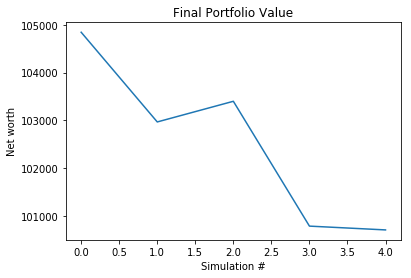

102538.770946 1593.38365073


In [12]:
actions = ['Buy', 'Sell', 'Hold']    # define the list of actions the agent can take
hist = 3
policy = RandomDecisionPolicy(actions)    # initail a random decision policy
budget = 100000.0    # set the initial amount of money available to use
num_stocks = 0    # set the number of stocks already owned

# run simulations multiple times to compute expected value of final net worth
avg, std = run_simulations(policy, budget, num_stocks, prices, hist)
print (avg, std)